# In class exercise...
* MI is biased in that small sample sizes lead to inaccurate estimates of PDFs, and that can sometimes lead to negative MI values (which should never happen in theory). 
* A common, and simple, approach, is to compute MI with shuffled condition labels (like randomization tests that we did many weeks back) and then subtract the shuffled MI from the actual MI. 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

In [5]:
# Taken from class code
def entropy(x):
    """compute entropy of discrete array x

    Args:
        x (int): array of discrete values

    Returns:
        Hx (float): entropy of x

    """
    # figure out unique values of x - can be more than just 0s, 1s
    uniquex = np.unique(x)

    Hx = 0
    for i in np.arange(len(uniquex)):
        # probability that x==uniquex[i]
        px = np.sum(x==uniquex[i])/len(x)    

        # check for px==0 because log2(0) = -inf
        if px!=0:
            Hx += (-np.sum( px * np.log2(px) ))  
        else:
            print('px is zero for value ', i)
        
    return Hx

In [6]:
def condEntropy(x,y):
    
    """
    conditional entropy, or the average entropy of x given each y, or Hxy
    1) For all Y {i=1:numel(X)}, compute the entropy of X given each Y
    2) Multiply H(X|Y==i) with the probability of each Y (i.e. pxi)
    3) Sum over all i

    Args:
        x (int): array of discrete values
        y (int): array of discrete values
        
    Returns:
        Hxy (float): average conditional entropy of x given y

    """

    Hxy=0
    uniquex = np.unique(x)
    uniquey = np.unique(y)

    # loop over unique elements of y
    for i in np.arange(len(uniquey)): 

        # probability that y==y(i) (prob of each y)
        py = np.sum(y==uniquey[i]) / N

        # then loop over all possible x's to compute entropy of x at each y
        tmp=0
        for j in np.arange(len(uniquex)):
            px_y = np.sum((x==uniquex[j]) & (y==uniquey[i])) / np.sum(y==uniquey[i])    # e.g. prob x==1 when y==0
            tmp += (-( px_y * np.log2(px_y) ))                                     # entropy      

        # then tally up entropy of x given each specific y multiplied by the probability of that y (py)
        Hxy += py*tmp

    return Hxy

## First set up two arrays of data...make them correlated to some degree so that there is a reasonably high MI...

In [50]:
# Setting up two arrays of data, 500 datapoints in each

N = 1000 
x = np.round(np.random.rand(N))
y = np.round(np.random.rand(N))

random_change = np.random.randint(1,1001,900)

for i in np.arange(N):
    if i in random_change:
        y[i] = x [i]

print('Correlation coefficient =', np.corrcoef(x,y))

Correlation coefficient = [[1.         0.60184544]
 [0.60184544 1.        ]]


## Then compute the MI between the arrays. Can do two discrete arrays for simplicity, and import the entropy and conditional entropy functions from the tutorial.

In [58]:
Hx = entropy(x=x)
Hxy = condEntropy(x=x, y=y)
comp_MI = Hx - Hxy
print('MI =', comp_MI)

MI = 0.2791499675110729


## Now repeat the above operations, but shuffle the data arrays and repeat the analysis many times (~500-1000 times). Plot the distribution of MI values that you get.

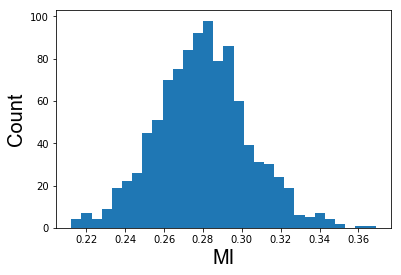

In [59]:
# number of bootstraps
num_bootstraps = 1000
MI = np.zeros(num_bootstraps)

# Loop to sample with replacement, generate sample number 
# from 0:N exclusive, N times
for i in np.arange(num_bootstraps):
    index = np.random.randint(0, high= N, size = N)
    
    # Pull data from arrays
    a = x[index]
    b = y[index]
    
    # Compute correlation and store MI
    Hx = entropy(x=a)
    Hxy = condEntropy(x=a, y=b)
    MI[i] = Hx - Hxy


plt.hist(MI, alpha=1, bins=30)
plt.xlabel('MI', **fig_font)
plt.ylabel('Count', **fig_font)
plt.show()


## Now subtract the mean of the shuffled MI values from your 'real' MI value...this will help correct for any bias that is introduced by a limited sample size

In [61]:
mean_MI = np.mean(MI)

print('Corrected MI =', comp_MI - mean_MI)

Corrected MI = -0.0006805583349984157
